In [39]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns



In [40]:

file_path = r"/Users/audrey/Documents/mental_music/Raw_Data.csv/Raw_Data-Table 1.csv"
df = pd.read_csv(file_path)
df

,Participants,Group,Order,Education,Sex,Age,Years of study,Mother's education,Father's education,Handedness,...,107.3,108.3,109.3,110.3,111.3,112.3,113.3,114.3,115.3,116.3
0,1,1,2,1,1,20,12,2,4,2,...,2,1,5,6,3,1,5,2,5,1
1,2,1,1,1,1,27,18,2,2,1,...,7,4,8,7,4,8,9,4,4,4
2,3,1,2,1,2,24,17,2,4,1,...,3,1,5,6,5,5,3,8,5,7
3,4,1,1,1,2,21,17,3,3,1,...,6,5,5,6,4,6,7,4,3,5
4,5,1,2,1,2,20,11,4,3,1,...,8,4,7,8,4,6,7,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,2,2,2,2,38,20,3,4,1,...,5,5,7,6,5,5,7,7,5,5
196,197,2,2,2,2,38,17,2,2,1,...,6,9,7,5,5,8,8,5,5,5
197,198,2,2,2,2,29,5,2,2,2,...,2,4,6,5,4,4,6,5,3,4
198,199,2,2,2,2,34,19,3,1,1,...,3,7,5,4,1,7,5,4,4,5


In [41]:
column_mapping = {
    "Years of study": "years_of_study",
    "Mother's education": "mothers_education",
    "Father's education": "fathers_education",
    "Neurologic disease": "neurologic_disease",
    "Auditive deficit ": "hearing_deficit",  
    "Visual deficit ": "visual_deficit",
    "Musical listening": "musical_listening",
    "Musical Experience": "musical_experience",
    "Parental influence": "parental_influence",
    "Hours of musical listening": "hours_musical_listening",
    "Hours of musical study": "hours_musical_study",
    "Years of musical education": "years_musical_education",
    "Musical style": "musical_style",
    "Musical instruments": "musical_instruments"
}

In [42]:
df = df.rename(columns = column_mapping)
df

,Participants,Group,Order,Education,Sex,Age,years_of_study,mothers_education,fathers_education,Handedness,...,107.3,108.3,109.3,110.3,111.3,112.3,113.3,114.3,115.3,116.3
0,1,1,2,1,1,20,12,2,4,2,...,2,1,5,6,3,1,5,2,5,1
1,2,1,1,1,1,27,18,2,2,1,...,7,4,8,7,4,8,9,4,4,4
2,3,1,2,1,2,24,17,2,4,1,...,3,1,5,6,5,5,3,8,5,7
3,4,1,1,1,2,21,17,3,3,1,...,6,5,5,6,4,6,7,4,3,5
4,5,1,2,1,2,20,11,4,3,1,...,8,4,7,8,4,6,7,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,2,2,2,2,38,20,3,4,1,...,5,5,7,6,5,5,7,7,5,5
196,197,2,2,2,2,38,17,2,2,1,...,6,9,7,5,5,8,8,5,5,5
197,198,2,2,2,2,29,5,2,2,2,...,2,4,6,5,4,4,6,5,3,4
198,199,2,2,2,2,34,19,3,1,1,...,3,7,5,4,1,7,5,4,4,5


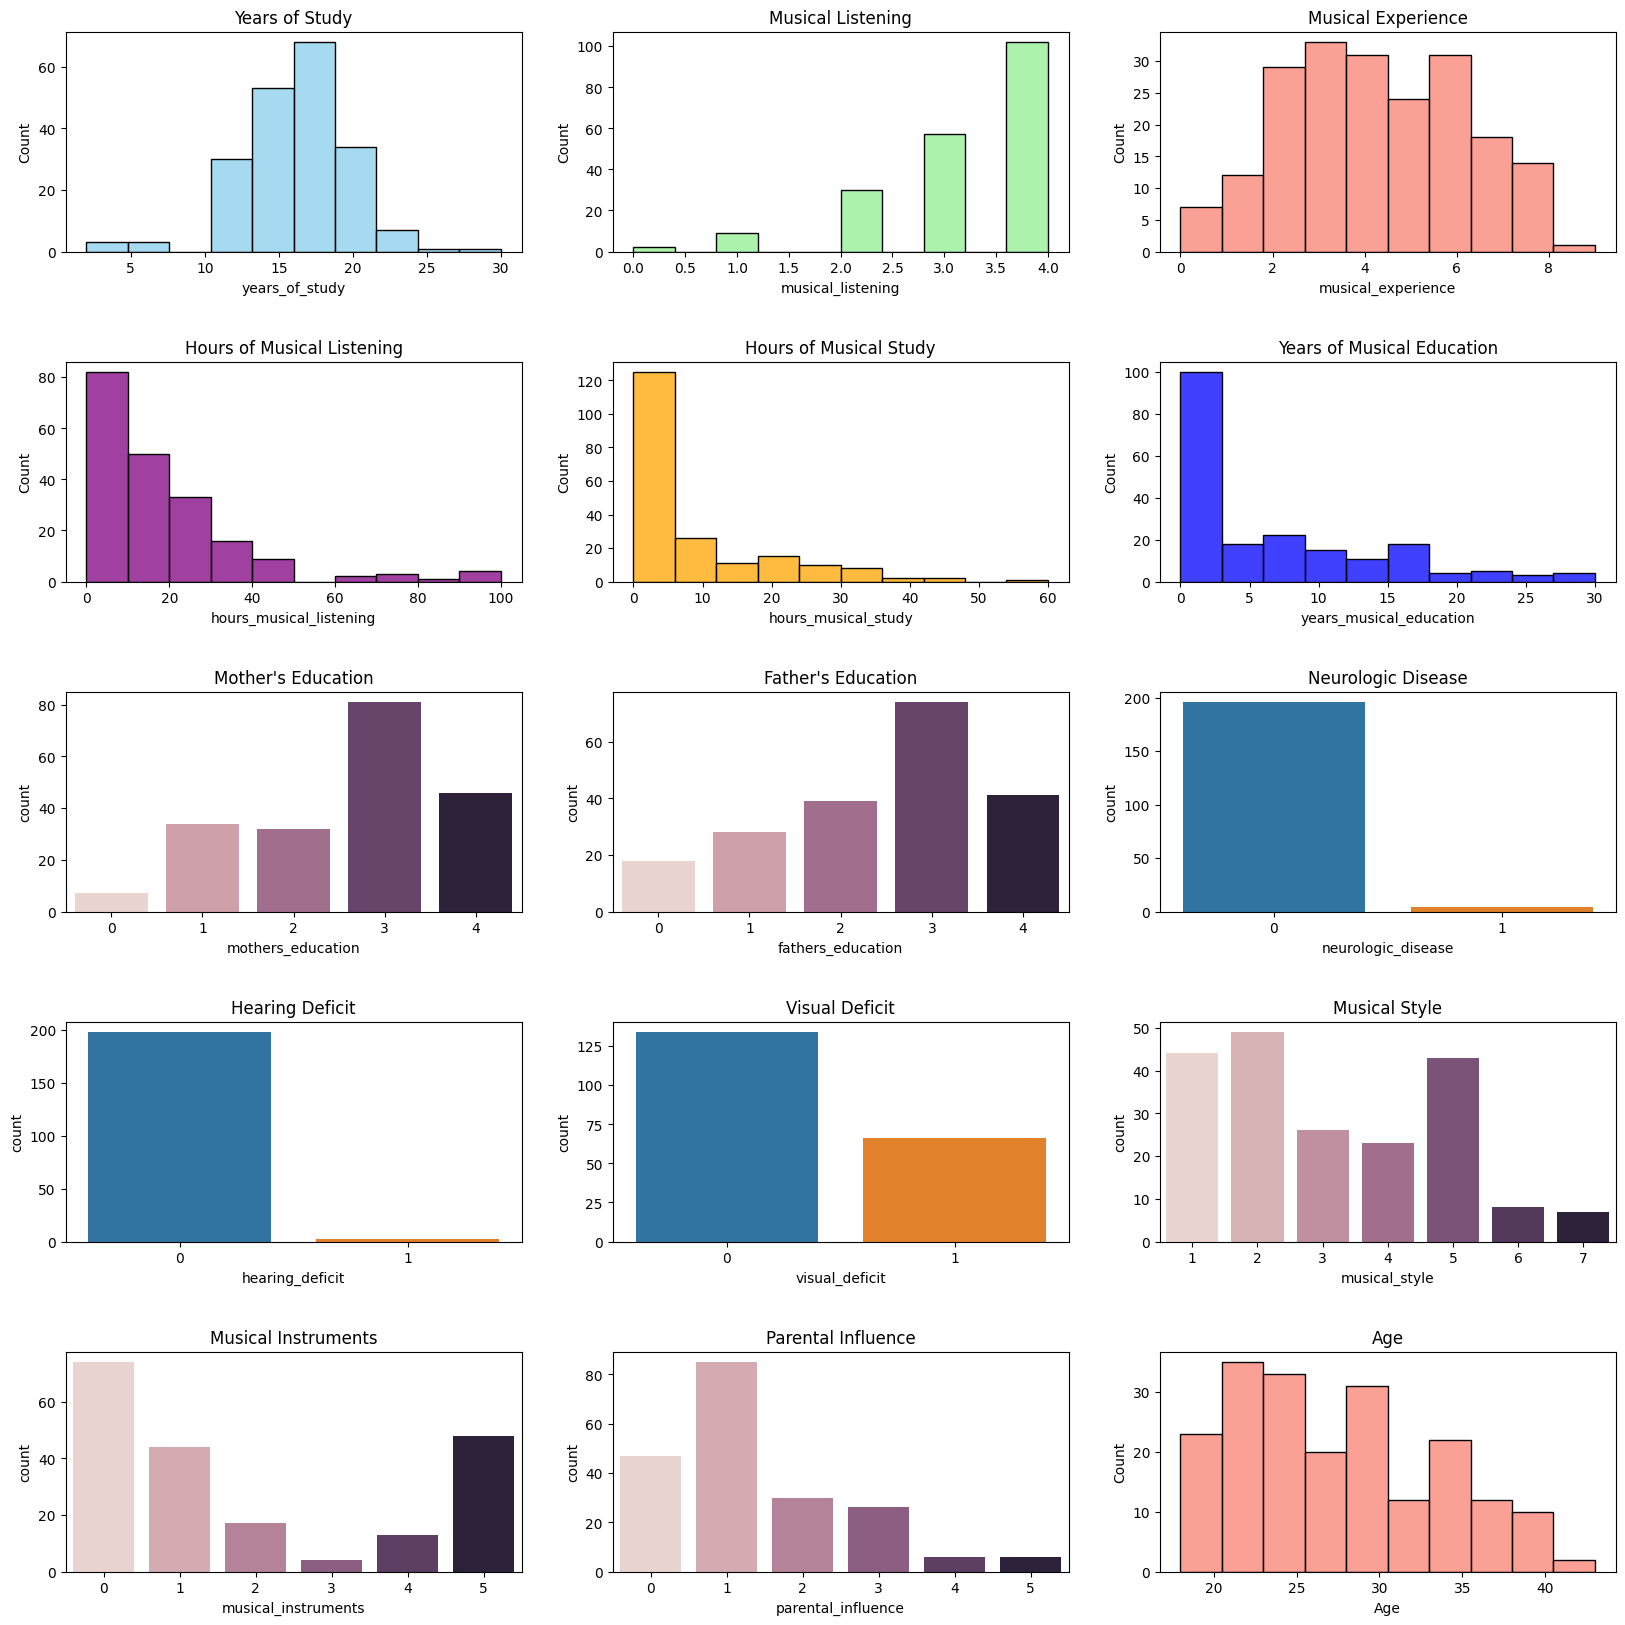

In [43]:
fig, axs = plt.subplots(5, 3, figsize = (20,20))
plt.subplots_adjust(hspace=0.5)

sns.histplot(df['years_of_study'], bins=10, ax=axs[0, 0], color='skyblue').set_title('Years of Study')
sns.histplot(df['musical_listening'], bins=10, ax=axs[0, 1], color='lightgreen').set_title('Musical Listening')
sns.histplot(df['musical_experience'], bins=10, ax=axs[0, 2], color='salmon').set_title('Musical Experience')

sns.histplot(df['hours_musical_listening'], bins=10, ax=axs[1, 0], color='purple').set_title('Hours of Musical Listening')
sns.histplot(df['hours_musical_study'], bins=10, ax=axs[1, 1], color='orange').set_title('Hours of Musical Study')
sns.histplot(df['years_musical_education'], bins=10, ax=axs[1, 2], color='blue').set_title('Years of Musical Education')

sns.countplot(x='mothers_education', data=df, ax=axs[2, 0], hue='mothers_education', legend=False).set_title("Mother's Education")
sns.countplot(x='fathers_education', data=df, ax=axs[2, 1], hue='fathers_education', legend=False).set_title("Father's Education")
sns.countplot(x='neurologic_disease', data=df, ax=axs[2, 2], hue='neurologic_disease', legend=False).set_title("Neurologic Disease")

sns.countplot(x='hearing_deficit', data=df, ax=axs[3, 0], hue='hearing_deficit', legend=False).set_title('Hearing Deficit')
sns.countplot(x='visual_deficit', data=df, ax=axs[3, 1], hue='visual_deficit', legend=False).set_title('Visual Deficit')
sns.countplot(x='musical_style', data=df, ax=axs[3, 2], hue='musical_style', legend=False).set_title('Musical Style')

sns.countplot(x='musical_instruments', data=df, ax=axs[4, 0], hue='musical_instruments', legend=False).set_title('Musical Instruments')
sns.countplot(x='parental_influence', data=df, ax=axs[4, 1], hue='parental_influence', legend=False).set_title('Parental Influence')
sns.histplot(df['Age'], bins=10, ax=axs[4, 2], color='salmon').set_title('Age')

plt.show()

In [44]:
df_null = df.isnull().sum()
df_null_counts = df_null.sort_values(ascending=False)
df_null_counts

Unnamed: 25     200
Unnamed: 265    200
Unnamed: 382    200
Unnamed: 142    190
Participants      0
               ... 
21.1              0
20.1              0
19.1              0
18.1              0
116.3             0
Length: 499, dtype: int64

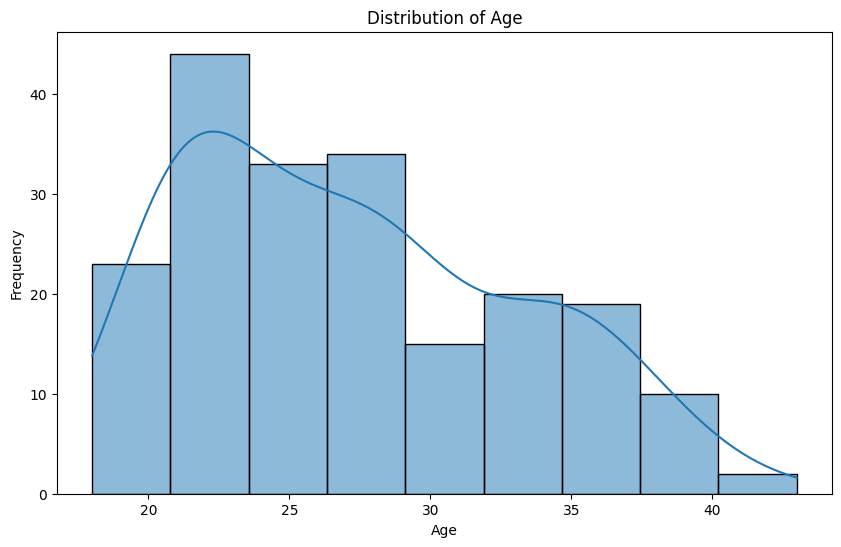

In [45]:

plt.figure(figsize = (10,6))
sns.histplot(df['Age'], kde = True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


In [46]:
plt.figure(figsize = (10,6))
sns.histplot(df['Musical Experience'], kde = True)
plt.title('Distribution of Musical Experience')
plt.xlabel('Years')
plt.ylabel('Frequency')
plt.show()

KeyError: 'Musical Experience'

<Figure size 1000x600 with 0 Axes>

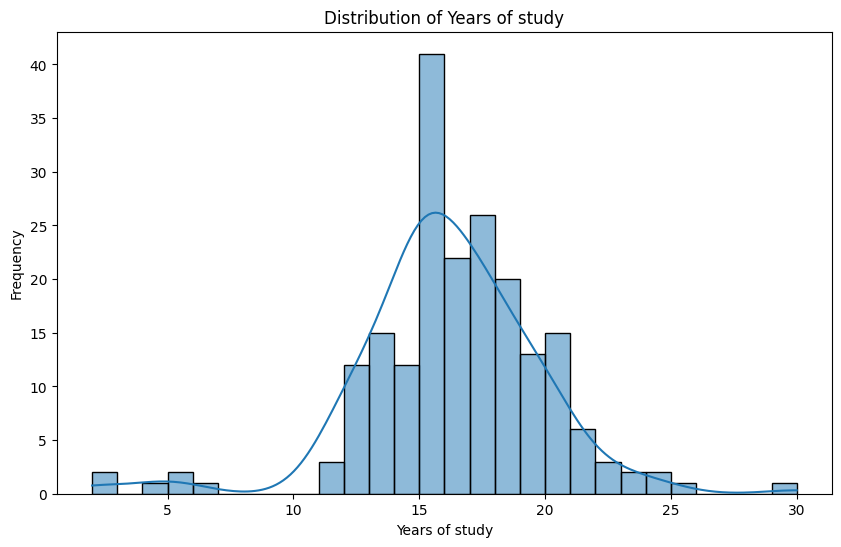

In [ ]:

plt.figure(figsize = (10,6))
sns.histplot(df['Years of study'], kde = True)
plt.title('Distribution of Years of study')
plt.xlabel('Years of study')
plt.ylabel('Frequency')
plt.show()

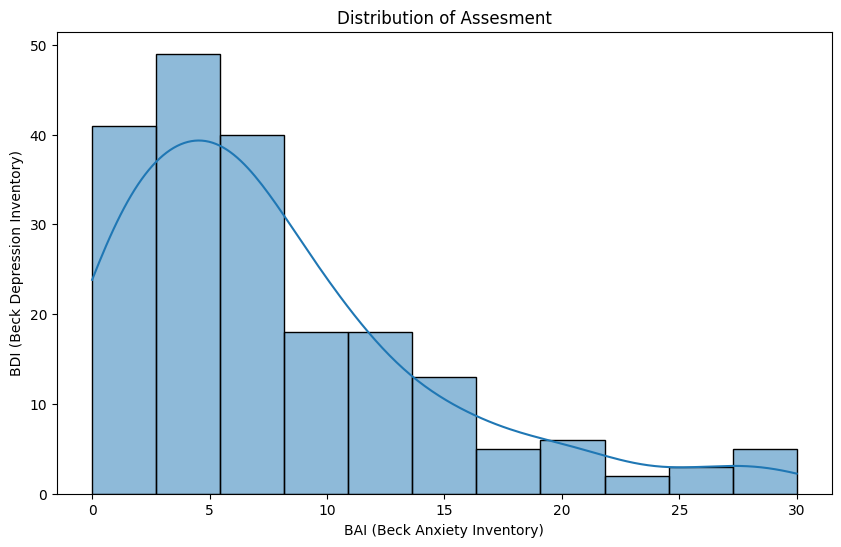

In [ ]:
plt.figure(figsize = (10,6))
sns.histplot(df['BAI'], kde = True)
plt.title('Distribution of Assesment')
plt.xlabel('BAI (Beck Anxiety Inventory)')
plt.ylabel('BDI (Beck Depression Inventory)')
plt.show()

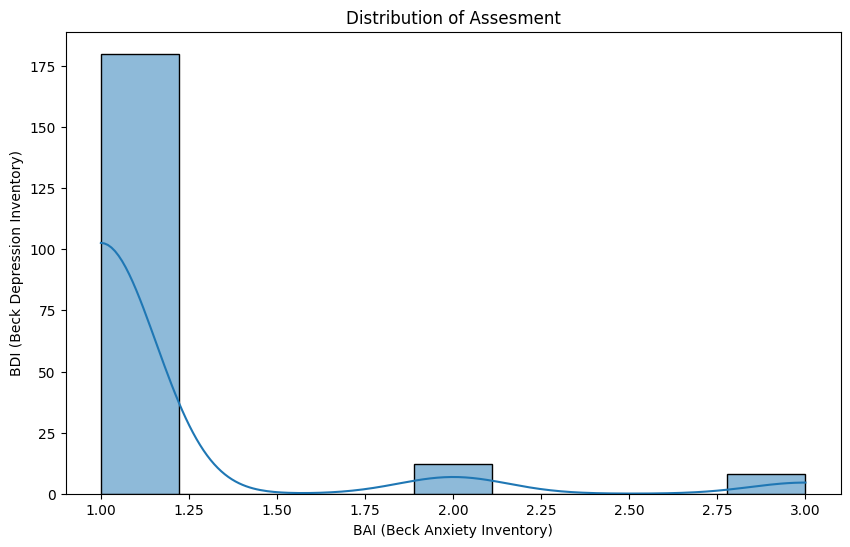

In [ ]:
plt.figure(figsize = (10,6))
sns.histplot(df['Handedness'], kde = True)
plt.title('Distribution of Assesment')
plt.xlabel('BAI (Beck Anxiety Inventory)')
plt.ylabel('BDI (Beck Depression Inventory)')
plt.show()